<a href="https://colab.research.google.com/github/igorjoz/machine-learning-course-and-projects/blob/main/23_Artificial_neuron_deep_learning_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
layer = Dense(units = 1, input_shape = [1])
model = Sequential([layer])
model.compile(optimizer = "sgd", loss = "mean_squared_error")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
xs = np.array([-1, 0, 1, 2, 3, 4], dtype = int)
ys = np.array([-5, -2, 1, 4,7,10],dtype = int)

In [ ]:
model.fit(xs,ys,epochs = 500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - loss: 41.4017
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 33.4248
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 27.1315
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 22.1631
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 18.2374
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 15.1324
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 12.6735
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 10.7231
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 9.1732
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 7.9387
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 6.9526
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 6.1623
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 5.5263
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.0120
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 4.5937
Epoch 16/5

=== Parametry znalezione analitycznie ===
Współczynnik m (slope): 3.8571
Bias b (offset):       -2.2857

=== Statystyki błędu (ręcznie) ===
MSE:  2.8571
RMSE: 1.6903
MAE:  1.4286

=== Porównanie wartości rzeczywistych i przewidywanych ===
 x  |  y_true  |  y_pred  |  error 
-----------------------------------
-1.0  |    -5.0  |   -6.14  |  -1.14
0.0  |    -2.0  |   -2.29  |  -0.29
1.0  |     1.0  |    1.57  |   0.57
2.0  |     4.0  |    5.43  |   1.43
3.0  |     7.0  |    9.29  |   2.29
4.0  |    16.0  |   13.14  |  -2.86


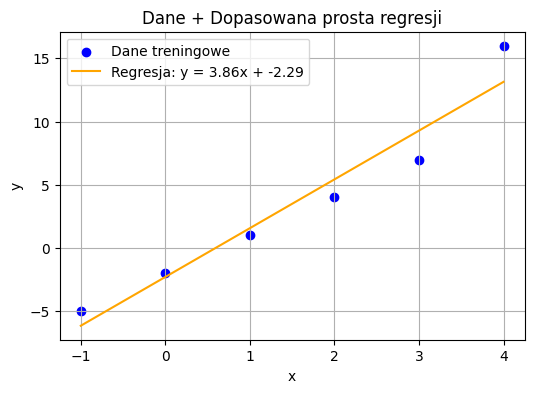

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dane wejściowe
xs = np.array([-1, 0, 1, 2, 3, 4], dtype=float)
ys = np.array([-5, -2, 1, 4, 7, 16], dtype=float)

# --- 1. Prosta regresja liniowa "ręcznie" metodą najmniejszych kwadratów ---

# Założymy model y = m*x + b (m = waga, b = bias).
# Znajdujemy współczynniki m i b minimalizujące MSE.

# Obliczamy średnie wartości:
x_mean = np.mean(xs)
y_mean = np.mean(ys)

# Obliczamy współczynnik m (slope) i bias b:
# m = Σ[(x - x_mean)*(y - y_mean)] / Σ[(x - x_mean)^2]
# b = y_mean - m*x_mean
m = np.sum((xs - x_mean) * (ys - y_mean)) / np.sum((xs - x_mean)**2)
b = y_mean - m * x_mean

print("=== Parametry znalezione analitycznie ===")
print(f"Współczynnik m (slope): {m:.4f}")
print(f"Bias b (offset):       {b:.4f}")

# --- 2. Prognozy i obliczenie błędów ---

predictions = m * xs + b

# Obliczamy statystyki błędu na zbiorze treningowym:
errors = predictions - ys
mse = np.mean(errors**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(errors))

print("\n=== Statystyki błędu (ręcznie) ===")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")

# --- 3. Wyświetlenie porównania wartości rzeczywistych i przewidywanych ---

print("\n=== Porównanie wartości rzeczywistych i przewidywanych ===")
print(" x  |  y_true  |  y_pred  |  error ")
print("-----------------------------------")
for x_val, y_true, y_pred, err in zip(xs, ys, predictions, errors):
    print(f"{x_val:>2}  |  {y_true:>6}  |  {y_pred:6.2f}  | {err:6.2f}")

# --- 4. Wykres: dane i prosta regresji ---

plt.figure(figsize=(6, 4))
plt.scatter(xs, ys, color='blue', label='Dane treningowe')
plt.plot(xs, predictions, color='orange', label=f'Regresja: y = {m:.2f}x + {b:.2f}')
plt.title("Dane + Dopasowana prosta regresji")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
